# **CNN Model to detected Handwritten Digit (0-9) using MNIST Dataset**

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2
import io
import time
from sklearn.model_selection import train_test_split
from PIL import Image as PILImage
from base64 import b64decode
import html

# Optional (Colab only)
try:
    from google.colab import files
    from google.colab.output import eval_js
    from IPython.display import display, Javascript, Image as DisplayImage
except ImportError:
    print("Colab-specific modules not found. Skipping those imports.")


In [17]:
print("🎯 CONSISTENT Handwritten Digit Recognizer")
print("=" * 60)

# ----------------------------------------------------------
# 1️⃣ Load and Preprocess MNIST Dataset
# ----------------------------------------------------------
print("\n📊 Loading MNIST dataset...")
(x_full, y_full), _ = keras.datasets.mnist.load_data()  # We'll ignore the default split

# Normalize and reshape
x_full = x_full.astype("float32") / 255.0
x_full = np.expand_dims(x_full, -1)

# Custom 70/30 split
x_train, x_test, y_train, y_test = train_test_split(
    x_full, y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full,
    shuffle=True
)

print(f"✅ Training data shape: {x_train.shape}")
print(f"✅ Test data shape: {x_test.shape}")
print(f"✅ Training samples: {len(x_train)}, Test samples: {len(x_test)}")

# ----------------------------------------------------------
# 2️⃣ Model Creation
# ----------------------------------------------------------
def create_consistent_model():
    """Simple but effective CNN for MNIST"""
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# ----------------------------------------------------------
# 3️⃣ Compile and Train
# ----------------------------------------------------------
print("\n🤖 Creating and training model...")
model = create_consistent_model()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=15,
    validation_split=0.1,
    verbose=1,
    callbacks=[keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

# ----------------------------------------------------------
# 4️⃣ Evaluate on Test Set
# ----------------------------------------------------------
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\n🎯 Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


🎯 CONSISTENT Handwritten Digit Recognizer

📊 Loading MNIST dataset...
✅ Training data shape: (48000, 28, 28, 1)
✅ Test data shape: (12000, 28, 28, 1)
✅ Training samples: 48000, Test samples: 12000

🤖 Creating and training model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7727 - loss: 0.6879 - val_accuracy: 0.9806 - val_loss: 0.0703
Epoch 2/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9695 - loss: 0.0978 - val_accuracy: 0.9871 - val_loss: 0.0465
Epoch 3/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9796 - loss: 0.0666 - val_accuracy: 0.9887 - val_loss: 0.0390
Epoch 4/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9827 - loss: 0.0553 - val_accuracy: 0.9898 - val_loss: 0.0396
Epoch 5/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9881 - loss: 0.0395 - val_accuracy: 0.9917 - val_loss: 0.0315
Epoch 6/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9871 - loss: 0.0382 - val_accuracy: 0.9923 - val_loss: 0.0287
Epoch 7/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9895 - loss: 0.0325 - val_accuracy: 0.9942 - val_loss: 0.0247
Epoch 8/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9901 - loss: 0.0308 - val_accuracy:

In [18]:
model.save('create_consistent_model.h5')
print("✅ Model trained and saved")

✅ Model trained and saved


In [19]:

# 2. SIMPLE AND PREDICTABLE PREPROCESSING
def simple_preprocess(image, inversion_method='auto'):
    """
    Simple preprocessing that matches MNIST style
    MNIST has white digits on black background
    """
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Resize to 28x28
    image = cv2.resize(image, (28, 28))

    # Handle inversion based on method
    if inversion_method == 'auto':
        # Simple auto-detection: if most pixels are white, invert
        if np.mean(image) > 127:
            image = 255 - image
    elif inversion_method == 'invert':
        image = 255 - image
    # else: keep as-is (for 'keep' option)

    # Normalize to 0-1 range
    image = image.astype('float32') / 255.0

    # Add dimensions for model
    image = np.expand_dims(image, -1)  # channel
    image = np.expand_dims(image, 0)   # batch

    return image

def show_preprocessing_options(original_image):
    """Show all preprocessing options side by side"""
    plt.figure(figsize=(15, 4))

    # Original
    plt.subplot(1, 4, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Option 1: Auto
    processed_auto = simple_preprocess(original_image, 'auto')[0, :, :, 0]
    plt.subplot(1, 4, 2)
    plt.imshow(processed_auto, cmap='gray')
    plt.title("Auto (Recommended)")
    plt.axis('off')

    # Option 2: Keep as-is
    processed_keep = simple_preprocess(original_image, 'keep')[0, :, :, 0]
    plt.subplot(1, 4, 3)
    plt.imshow(processed_keep, cmap='gray')
    plt.title("Keep Original")
    plt.axis('off')

    # Option 3: Force invert
    processed_invert = simple_preprocess(original_image, 'invert')[0, :, :, 0]
    plt.subplot(1, 4, 4)
    plt.imshow(processed_invert, cmap='gray')
    plt.title("Force Invert")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return {
        'auto': processed_auto,
        'keep': processed_keep,
        'invert': processed_invert
    }

def predict_all_methods(image_array):
    """Predict using all preprocessing methods and compare"""
    methods = ['auto', 'keep', 'invert']
    results = {}

    print("\n🔍 Comparing all preprocessing methods:")
    print("-" * 50)

    for method in methods:
        processed = simple_preprocess(image_array, method)
        prediction = model.predict(processed, verbose=0)[0]
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction)

        results[method] = {
            'digit': predicted_digit,
            'confidence': confidence,
            'all_probs': prediction
        }

        print(f"   {method:8s} → Digit: {predicted_digit}, Confidence: {confidence:.4f}")

    return results

def analyze_uploaded_image():
    """Main function to handle image upload and prediction"""
    print("\n📁 Upload a handwritten digit image...")

    uploaded = files.upload()
    if not uploaded:
        print("❌ No file uploaded!")
        return

    file_name = list(uploaded.keys())[0]
    print(f"📄 Processing: {file_name}")

    # Load image
    image = PILImage.open(io.BytesIO(uploaded[file_name]))
    image_array = np.array(image)

    # Show all preprocessing options
    print("\n🖼️ Showing all preprocessing options:")
    processed_images = show_preprocessing_options(image_array)

    # Get predictions for all methods
    results = predict_all_methods(image_array)

    # Find the most confident prediction
    best_method = max(results.keys(), key=lambda x: results[x]['confidence'])
    best_result = results[best_method]

    print(f"\n⭐ BEST PREDICTION: {best_result['digit']} (using '{best_method}' method)")
    print(f"   Confidence: {best_result['confidence']:.4f}")

    # Show detailed probabilities for best method
    print(f"\n📊 Detailed probabilities for '{best_method}' method:")
    for digit, prob in enumerate(best_result['all_probs']):
        indicator = " ← BEST" if digit == best_result['digit'] else ""
        print(f"   Digit {digit}: {prob:.4f} ({prob*100:.1f}%){indicator}")

    # Let user choose which method to use
    print(f"\n🎯 You can trust the '{best_method}' method (highest confidence)")
    print("   Or choose manually based on the images above")

    return best_result['digit'], best_result['confidence']


In [20]:
def analyze_uploaded_imageo(file_name):
    """Main function to handle image upload and prediction"""

    # Load image
    image = PILImage.open(file_name)
    image_array = np.array(image)

    # Show all preprocessing options
    print("\n🖼️ Showing all preprocessing options:")
    processed_images = show_preprocessing_options(image_array)

    # Get predictions for all methods
    results = predict_all_methods(image_array)

    # Find the most confident prediction
    best_method = max(results.keys(), key=lambda x: results[x]['confidence'])
    best_result = results[best_method]

    print(f"\n⭐ BEST PREDICTION: {best_result['digit']} (using '{best_method}' method)")
    print(f"   Confidence: {best_result['confidence']:.4f}")

    # Show detailed probabilities for best method
    print(f"\n📊 Detailed probabilities for '{best_method}' method:")
    for digit, prob in enumerate(best_result['all_probs']):
        indicator = " ← BEST" if digit == best_result['digit'] else ""
        print(f"   Digit {digit}: {prob:.4f} ({prob*100:.1f}%){indicator}")

    # Let user choose which method to use
    print(f"\n🎯 You can trust the '{best_method}' method (highest confidence)")
    print("   Or choose manually based on the images above")

    return best_result['digit'], best_result['confidence']


In [21]:
# 3. CAMERA CAPTURE FUNCTIONS FOR GOOGLE COLAB
def take_photo(filename='photo.jpg', quality=0.8):
    """Capture photo from webcam in Google Colab"""
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    # Get photo data
    data = eval_js('takePhoto({})'.format(quality))

    # Decode base64 image
    binary = b64decode(data.split(',')[1])

    # Save image
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

In [22]:
def real_time_capture_and_predict():
    """Main function for real-time capture and prediction"""
    print("\n🎥 REAL-TIME CAPTURE MODE")
    print("=" * 40)

    while True:
        print("\n📸 Capture Options:")
        print("1. Capture single photo")
        print("2. Upload existing image")
        print("3. Return to main menu")

        choice = input("\nEnter your choice (1-3): ").strip()

        if choice == '1':
            print("\n🔄 Starting camera... Click 'Capture' when ready!")
            try:
                filename = take_photo('captured_digit.jpg')
                print(f"✅ Photo captured: {filename}")

                # Predict immediately
                digit, confidence, _ = analyze_uploaded_imageo(filename)

                if confidence > 0.8:
                    print(f"🎉 High confidence prediction: {digit}")
                else:
                    print("⚠️  Low confidence. Try capturing again with clearer digit.")

            except Exception as e:
                print(f"❌ Error capturing photo: {e}")
                print("💡 Make sure you allow camera access when prompted")

        elif choice == '2':
            print("\n📁 Upload an existing image...")
            uploaded = files.upload()
            if uploaded:
                filename = list(uploaded.keys())[0]
                print(f"📄 Processing: {filename}")
                analyze_uploaded_imageo(filename)
            else:
                print("❌ No file uploaded!")

        elif choice == '3':
            break

        else:
            print("❌ Invalid choice! Please enter 1-3")


In [23]:

# 3. TEST WITH KNOWN GOOD IMAGES
def test_with_mnist_samples():
    """Test with actual MNIST samples to verify model is working"""
    print("\n🧪 Testing with MNIST test samples...")

    # Get some test samples
    indices = np.random.choice(len(x_test), 12, replace=False)

    plt.figure(figsize=(15, 10))
    correct = 0
    total = len(indices)

    for i, idx in enumerate(indices):
        test_image = x_test[idx]
        true_label = y_test[idx]

        prediction = model.predict(np.expand_dims(test_image, 0), verbose=0)[0]
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction)

        is_correct = predicted_digit == true_label
        if is_correct:
            correct += 1

        plt.subplot(3, 4, i+1)
        plt.imshow(test_image[:, :, 0], cmap='gray')
        color = 'green' if is_correct else 'red'
        plt.title(f"True: {true_label}, Pred: {predicted_digit}\nConf: {confidence:.2f}",
                 color=color, fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    accuracy = correct / total
    print(f"✅ Test Accuracy on these samples: {accuracy:.2f} ({correct}/{total} correct)")

    return accuracy


In [24]:

# 4. BATCH TEST MULTIPLE UPLOADED IMAGES
def batch_test_images():
    """Test multiple uploaded images at once"""
    print("\n📚 Upload multiple digit images for batch testing...")

    uploaded = files.upload()
    if not uploaded:
        print("❌ No files uploaded!")
        return

    results = []

    for file_name in uploaded.keys():
        print(f"\n📄 Processing: {file_name}")

        # Load and process image
        image = PILImage.open(io.BytesIO(uploaded[file_name]))
        image_array = np.array(image)

        # Use auto method (most reliable)
        processed = simple_preprocess(image_array, 'auto')
        prediction = model.predict(processed, verbose=0)[0]
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction)

        results.append({
            'file': file_name,
            'digit': predicted_digit,
            'confidence': confidence
        })

        print(f"   → Predicted: {predicted_digit} (confidence: {confidence:.4f})")

    # Show summary
    print(f"\n📋 BATCH RESULTS SUMMARY:")
    print("-" * 40)
    for result in results:
        print(f"   {result['file']:20} → Digit: {result['digit']} (conf: {result['confidence']:.4f})")

    return results


In [25]:

# 5. MAIN MENU
def main_menu():
    while True:
        print("\n" + "="*50)
        print("🎮 CONSISTENT DIGIT RECOGNIZER - MAIN MENU")
        print("1. 📁 Upload single image (see all methods)")
        print("2. 📚 Upload multiple images (batch test)")
        print("3. 🧪 Test with MNIST samples (verify accuracy)")
        print("4. 📈 Show training history")
        print("5. 🏃‍♂️ Exit")
        print("6. 🎥 Camera Capture & Predict (Real-time)")

        choice = input("\nEnter your choice (1-6): ").strip()

        if choice == '1':
            analyze_uploaded_image()

        elif choice == '2':
            batch_test_images()

        elif choice == '3':
            test_with_mnist_samples()

        elif choice == '4':
            plt.figure(figsize=(12, 4))

            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='Training Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.title('Model Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.grid(True)

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title('Model Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)

            plt.tight_layout()
            plt.show()

        elif choice == '5':
            print("👋 Thank you for using the Consistent Digit Recognizer!")
            break
        elif choice == '6':
            real_time_capture_and_predict()


        else:
            print("❌ Invalid choice! Please enter 1-6")



🎯 KEY FEATURES:
   • Consistent preprocessing
   • Shows ALL preprocessing options
   • Compares results from different methods
   • Recommends best method automatically
   • Simple and reliable model
   • Webcam capture in Google Colab

📊 MODEL PERFORMANCE: 99.20% accuracy
✅ Model is highly accurate!

💡 TIPS:
   • Use clear handwritten digits
   • The 'auto' method usually works best
   • Compare all preprocessing options if unsure
   • Check confidence scores for reliability

🎮 CONSISTENT DIGIT RECOGNIZER - MAIN MENU
1. 📁 Upload single image (see all methods)
2. 📚 Upload multiple images (batch test)
3. 🧪 Test with MNIST samples (verify accuracy)
4. 📈 Show training history
5. 🏃‍♂️ Exit
6. 🎥 Camera Capture & Predict (Real-time)

Enter your choice (1-5): 6

🎥 REAL-TIME CAPTURE MODE

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


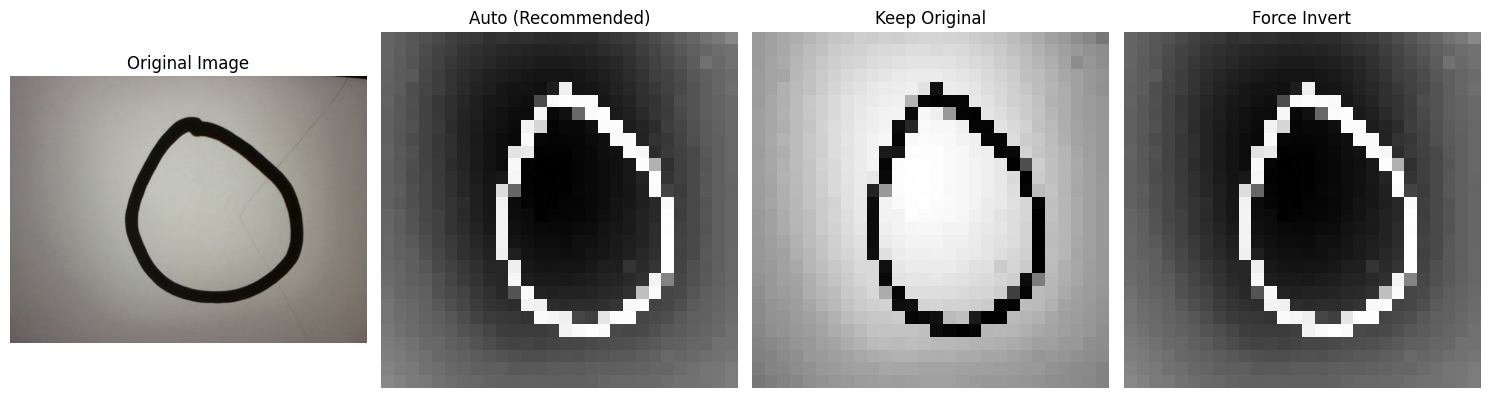


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 0, Confidence: 0.9985
   keep     → Digit: 6, Confidence: 0.3581
   invert   → Digit: 0, Confidence: 0.9985

⭐ BEST PREDICTION: 0 (using 'auto' method)
   Confidence: 0.9985

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.9985 (99.9%) ← BEST
   Digit 1: 0.0000 (0.0%)
   Digit 2: 0.0002 (0.0%)
   Digit 3: 0.0000 (0.0%)
   Digit 4: 0.0000 (0.0%)
   Digit 5: 0.0001 (0.0%)
   Digit 6: 0.0003 (0.0%)
   Digit 7: 0.0000 (0.0%)
   Digit 8: 0.0005 (0.1%)
   Digit 9: 0.0003 (0.0%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


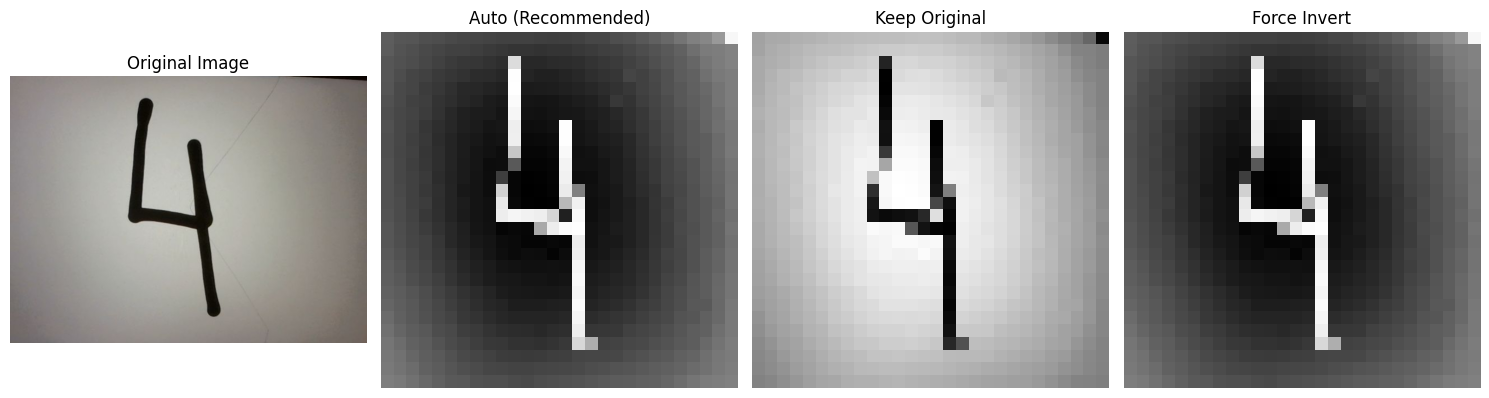


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 4, Confidence: 0.9092
   keep     → Digit: 4, Confidence: 0.3697
   invert   → Digit: 4, Confidence: 0.9092

⭐ BEST PREDICTION: 4 (using 'auto' method)
   Confidence: 0.9092

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0001 (0.0%)
   Digit 1: 0.0095 (1.0%)
   Digit 2: 0.0011 (0.1%)
   Digit 3: 0.0008 (0.1%)
   Digit 4: 0.9092 (90.9%) ← BEST
   Digit 5: 0.0076 (0.8%)
   Digit 6: 0.0007 (0.1%)
   Digit 7: 0.0014 (0.1%)
   Digit 8: 0.0078 (0.8%)
   Digit 9: 0.0617 (6.2%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


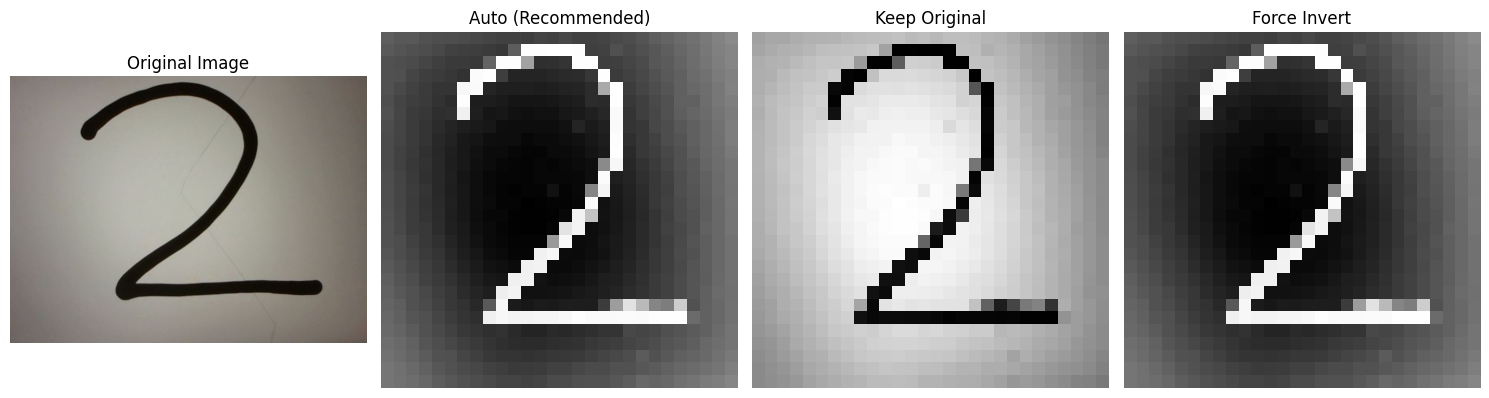


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 2, Confidence: 0.9905
   keep     → Digit: 4, Confidence: 0.4284
   invert   → Digit: 2, Confidence: 0.9905

⭐ BEST PREDICTION: 2 (using 'auto' method)
   Confidence: 0.9905

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0002 (0.0%)
   Digit 1: 0.0077 (0.8%)
   Digit 2: 0.9905 (99.0%) ← BEST
   Digit 3: 0.0001 (0.0%)
   Digit 4: 0.0002 (0.0%)
   Digit 5: 0.0000 (0.0%)
   Digit 6: 0.0002 (0.0%)
   Digit 7: 0.0002 (0.0%)
   Digit 8: 0.0010 (0.1%)
   Digit 9: 0.0000 (0.0%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


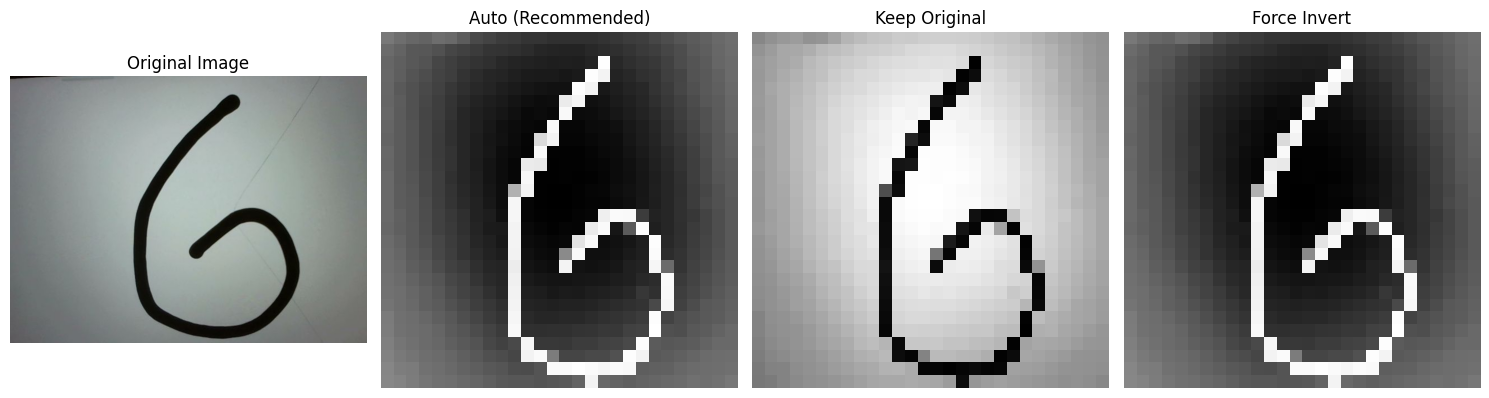


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 6, Confidence: 0.9272
   keep     → Digit: 6, Confidence: 0.6765
   invert   → Digit: 6, Confidence: 0.9272

⭐ BEST PREDICTION: 6 (using 'auto' method)
   Confidence: 0.9272

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0059 (0.6%)
   Digit 1: 0.0034 (0.3%)
   Digit 2: 0.0020 (0.2%)
   Digit 3: 0.0002 (0.0%)
   Digit 4: 0.0248 (2.5%)
   Digit 5: 0.0087 (0.9%)
   Digit 6: 0.9272 (92.7%) ← BEST
   Digit 7: 0.0004 (0.0%)
   Digit 8: 0.0240 (2.4%)
   Digit 9: 0.0034 (0.3%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


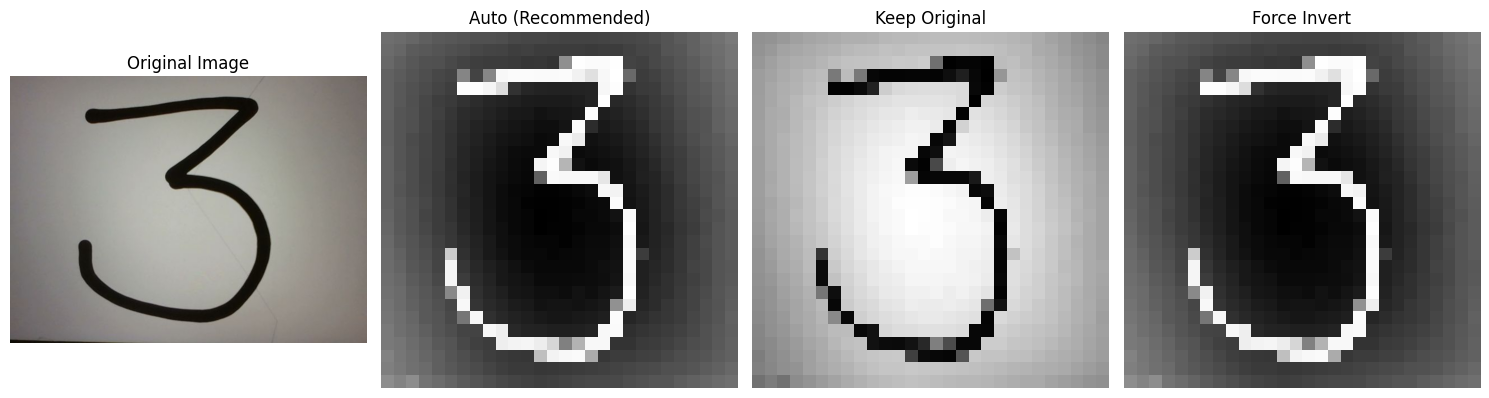


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 3, Confidence: 0.8029
   keep     → Digit: 8, Confidence: 0.2571
   invert   → Digit: 3, Confidence: 0.8029

⭐ BEST PREDICTION: 3 (using 'auto' method)
   Confidence: 0.8029

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0041 (0.4%)
   Digit 1: 0.0078 (0.8%)
   Digit 2: 0.0047 (0.5%)
   Digit 3: 0.8029 (80.3%) ← BEST
   Digit 4: 0.0015 (0.2%)
   Digit 5: 0.1002 (10.0%)
   Digit 6: 0.0013 (0.1%)
   Digit 7: 0.0219 (2.2%)
   Digit 8: 0.0088 (0.9%)
   Digit 9: 0.0466 (4.7%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


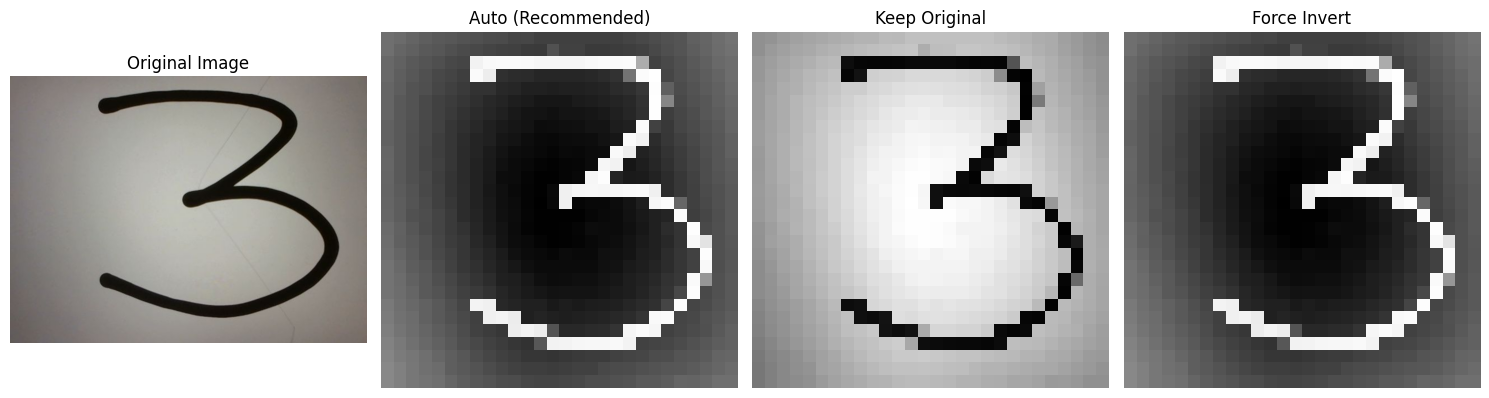


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 3, Confidence: 0.5395
   keep     → Digit: 6, Confidence: 0.4799
   invert   → Digit: 3, Confidence: 0.5395

⭐ BEST PREDICTION: 3 (using 'auto' method)
   Confidence: 0.5395

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0100 (1.0%)
   Digit 1: 0.0033 (0.3%)
   Digit 2: 0.0114 (1.1%)
   Digit 3: 0.5395 (54.0%) ← BEST
   Digit 4: 0.0085 (0.9%)
   Digit 5: 0.3103 (31.0%)
   Digit 6: 0.0057 (0.6%)
   Digit 7: 0.0153 (1.5%)
   Digit 8: 0.0845 (8.4%)
   Digit 9: 0.0113 (1.1%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


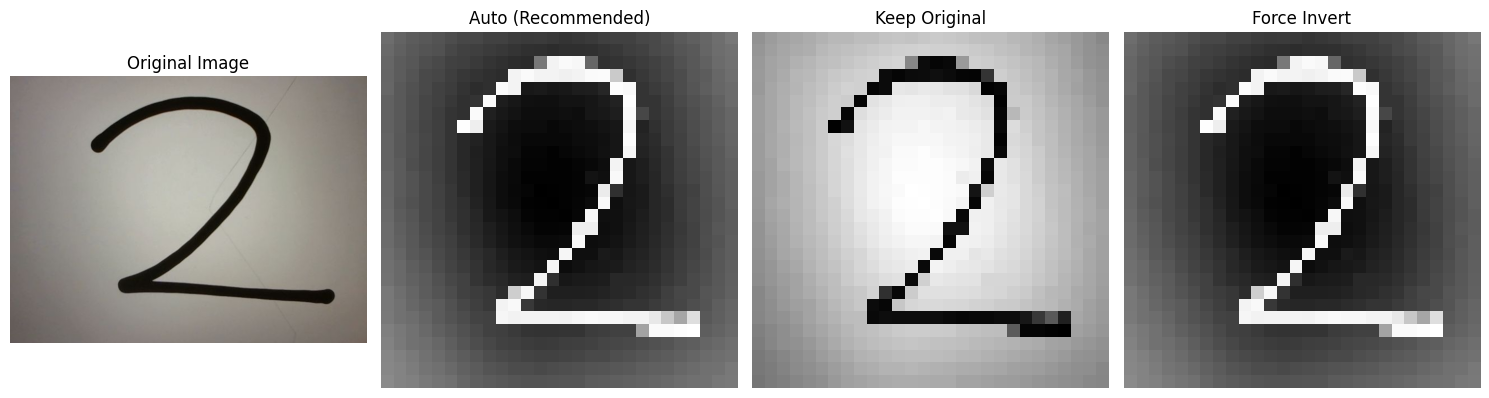


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 2, Confidence: 0.9910
   keep     → Digit: 2, Confidence: 0.6148
   invert   → Digit: 2, Confidence: 0.9910

⭐ BEST PREDICTION: 2 (using 'auto' method)
   Confidence: 0.9910

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0014 (0.1%)
   Digit 1: 0.0034 (0.3%)
   Digit 2: 0.9910 (99.1%) ← BEST
   Digit 3: 0.0016 (0.2%)
   Digit 4: 0.0001 (0.0%)
   Digit 5: 0.0001 (0.0%)
   Digit 6: 0.0001 (0.0%)
   Digit 7: 0.0008 (0.1%)
   Digit 8: 0.0012 (0.1%)
   Digit 9: 0.0002 (0.0%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


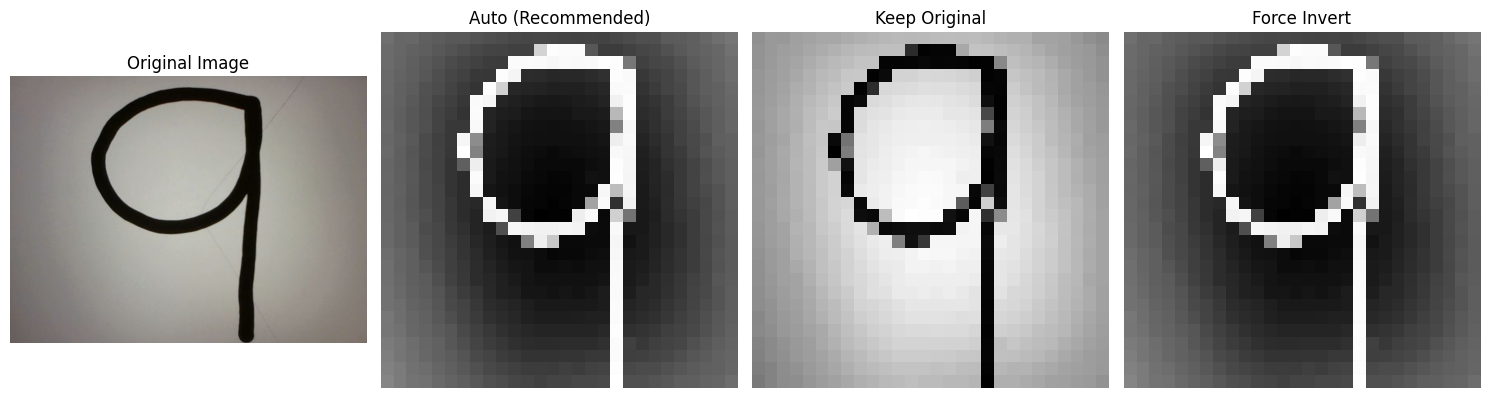


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 4, Confidence: 0.9612
   keep     → Digit: 4, Confidence: 0.3360
   invert   → Digit: 4, Confidence: 0.9612

⭐ BEST PREDICTION: 4 (using 'auto' method)
   Confidence: 0.9612

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0000 (0.0%)
   Digit 1: 0.0000 (0.0%)
   Digit 2: 0.0002 (0.0%)
   Digit 3: 0.0001 (0.0%)
   Digit 4: 0.9612 (96.1%) ← BEST
   Digit 5: 0.0003 (0.0%)
   Digit 6: 0.0000 (0.0%)
   Digit 7: 0.0000 (0.0%)
   Digit 8: 0.0002 (0.0%)
   Digit 9: 0.0380 (3.8%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


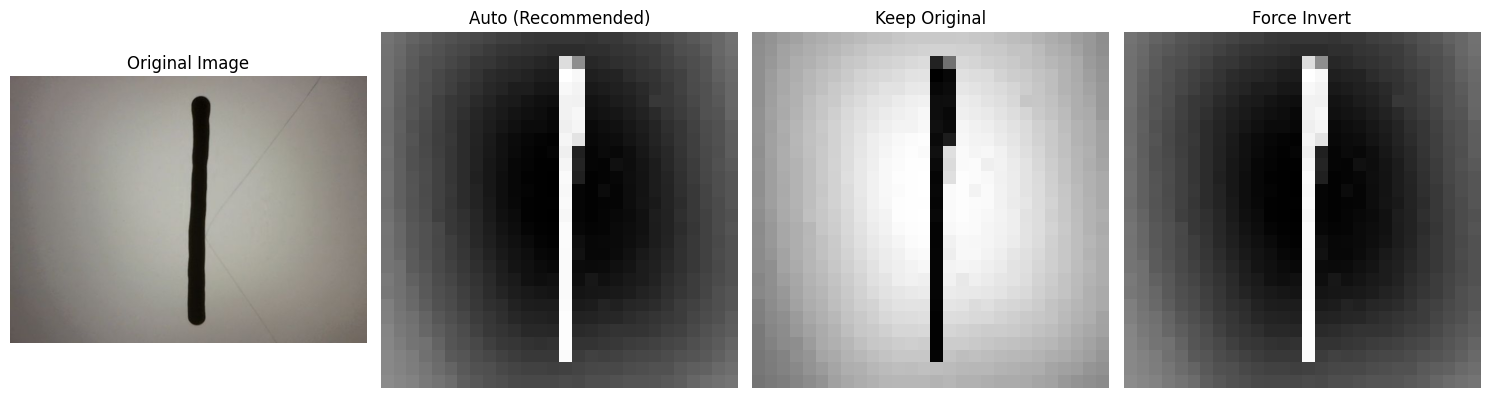


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 1, Confidence: 0.9831
   keep     → Digit: 4, Confidence: 0.9284
   invert   → Digit: 1, Confidence: 0.9831

⭐ BEST PREDICTION: 1 (using 'auto' method)
   Confidence: 0.9831

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0010 (0.1%)
   Digit 1: 0.9831 (98.3%) ← BEST
   Digit 2: 0.0010 (0.1%)
   Digit 3: 0.0005 (0.1%)
   Digit 4: 0.0043 (0.4%)
   Digit 5: 0.0026 (0.3%)
   Digit 6: 0.0020 (0.2%)
   Digit 7: 0.0027 (0.3%)
   Digit 8: 0.0020 (0.2%)
   Digit 9: 0.0008 (0.1%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 2

📁 Upload an existing image...


Saving Screenshot 2025-11-08 080814.png to Screenshot 2025-11-08 080814.png
📄 Processing: Screenshot 2025-11-08 080814.png

🖼️ Showing all preprocessing options:


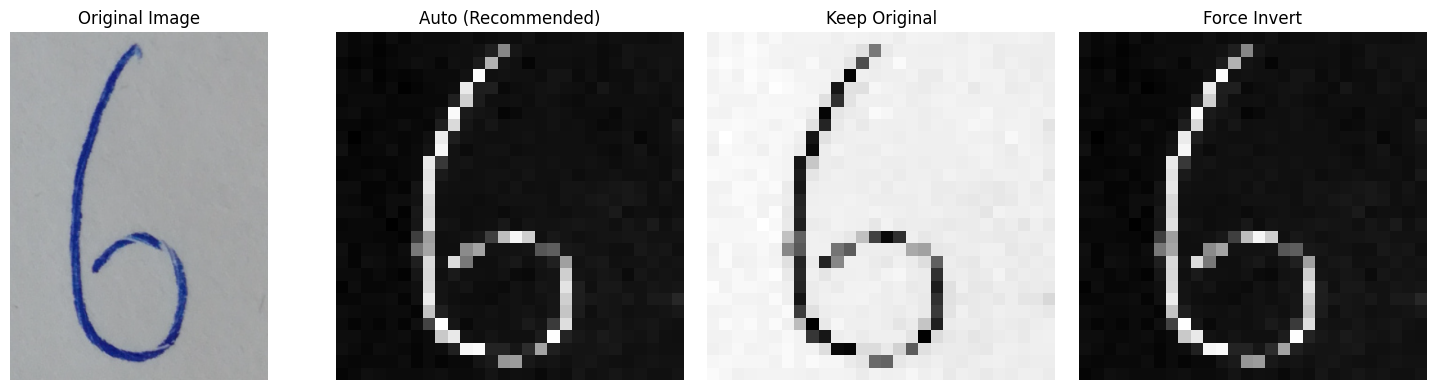


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 6, Confidence: 0.3387
   keep     → Digit: 8, Confidence: 0.2156
   invert   → Digit: 6, Confidence: 0.3387

⭐ BEST PREDICTION: 6 (using 'auto' method)
   Confidence: 0.3387

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0473 (4.7%)
   Digit 1: 0.0386 (3.9%)
   Digit 2: 0.0475 (4.8%)
   Digit 3: 0.0082 (0.8%)
   Digit 4: 0.1225 (12.2%)
   Digit 5: 0.1370 (13.7%)
   Digit 6: 0.3387 (33.9%) ← BEST
   Digit 7: 0.0089 (0.9%)
   Digit 8: 0.2182 (21.8%)
   Digit 9: 0.0331 (3.3%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


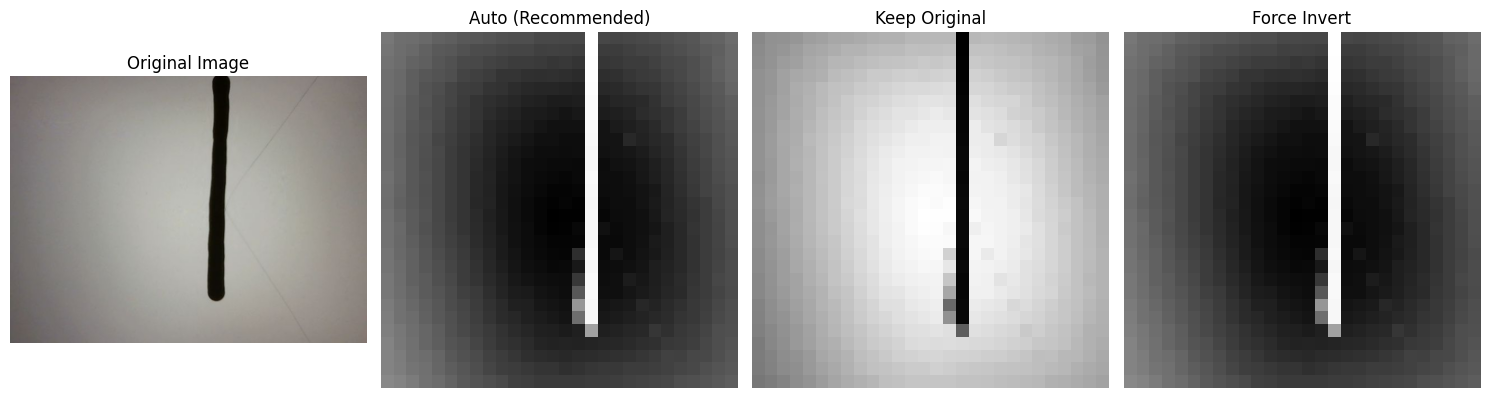


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 1, Confidence: 0.7220
   keep     → Digit: 4, Confidence: 0.3814
   invert   → Digit: 1, Confidence: 0.7220

⭐ BEST PREDICTION: 1 (using 'auto' method)
   Confidence: 0.7220

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0222 (2.2%)
   Digit 1: 0.7220 (72.2%) ← BEST
   Digit 2: 0.0249 (2.5%)
   Digit 3: 0.0061 (0.6%)
   Digit 4: 0.1079 (10.8%)
   Digit 5: 0.0160 (1.6%)
   Digit 6: 0.0101 (1.0%)
   Digit 7: 0.0618 (6.2%)
   Digit 8: 0.0111 (1.1%)
   Digit 9: 0.0179 (1.8%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


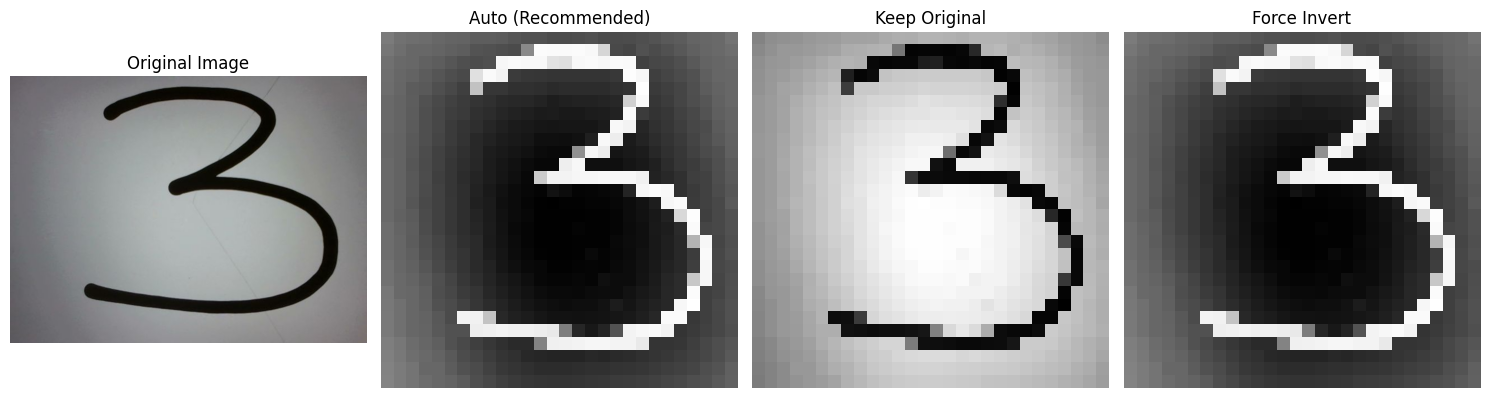


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 5, Confidence: 0.7470
   keep     → Digit: 6, Confidence: 0.7548
   invert   → Digit: 5, Confidence: 0.7470

⭐ BEST PREDICTION: 6 (using 'keep' method)
   Confidence: 0.7548

📊 Detailed probabilities for 'keep' method:
   Digit 0: 0.0126 (1.3%)
   Digit 1: 0.0182 (1.8%)
   Digit 2: 0.0225 (2.3%)
   Digit 3: 0.0082 (0.8%)
   Digit 4: 0.0125 (1.3%)
   Digit 5: 0.0837 (8.4%)
   Digit 6: 0.7548 (75.5%) ← BEST
   Digit 7: 0.0017 (0.2%)
   Digit 8: 0.0829 (8.3%)
   Digit 9: 0.0030 (0.3%)

🎯 You can trust the 'keep' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


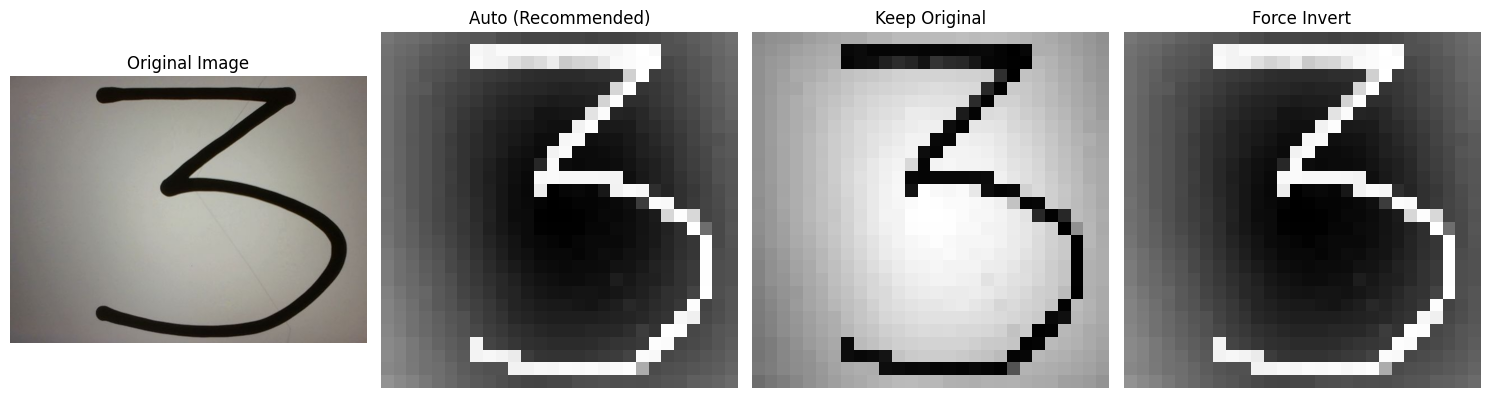


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 5, Confidence: 0.7732
   keep     → Digit: 6, Confidence: 0.5015
   invert   → Digit: 5, Confidence: 0.7732

⭐ BEST PREDICTION: 5 (using 'auto' method)
   Confidence: 0.7732

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0147 (1.5%)
   Digit 1: 0.0047 (0.5%)
   Digit 2: 0.0049 (0.5%)
   Digit 3: 0.0520 (5.2%)
   Digit 4: 0.0069 (0.7%)
   Digit 5: 0.7732 (77.3%) ← BEST
   Digit 6: 0.0274 (2.7%)
   Digit 7: 0.0347 (3.5%)
   Digit 8: 0.0213 (2.1%)
   Digit 9: 0.0601 (6.0%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


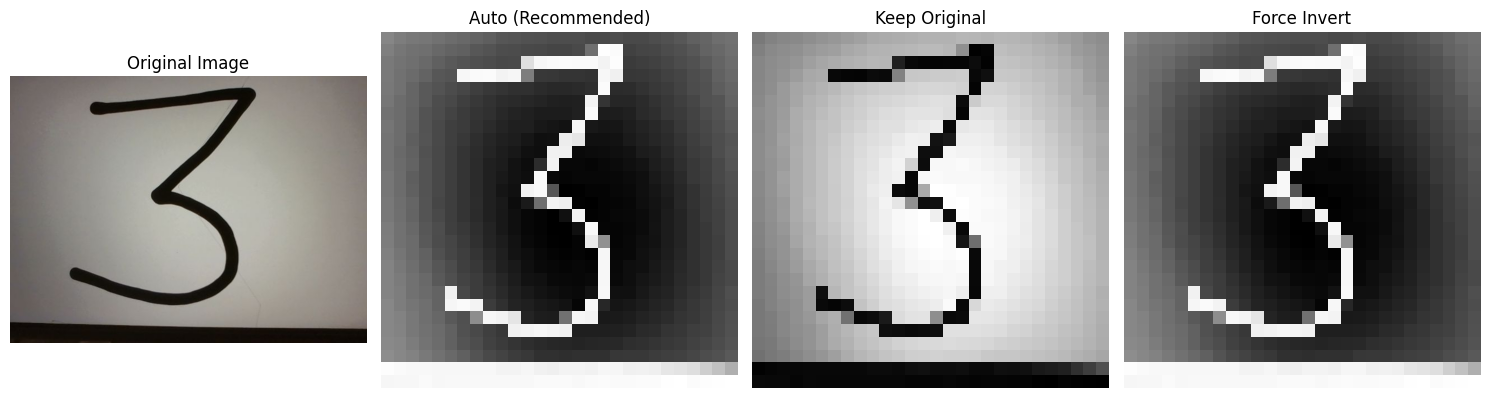


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 3, Confidence: 0.5115
   keep     → Digit: 4, Confidence: 0.2652
   invert   → Digit: 3, Confidence: 0.5115

⭐ BEST PREDICTION: 3 (using 'auto' method)
   Confidence: 0.5115

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0052 (0.5%)
   Digit 1: 0.0103 (1.0%)
   Digit 2: 0.0059 (0.6%)
   Digit 3: 0.5115 (51.2%) ← BEST
   Digit 4: 0.0071 (0.7%)
   Digit 5: 0.3452 (34.5%)
   Digit 6: 0.0116 (1.2%)
   Digit 7: 0.0033 (0.3%)
   Digit 8: 0.0621 (6.2%)
   Digit 9: 0.0378 (3.8%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


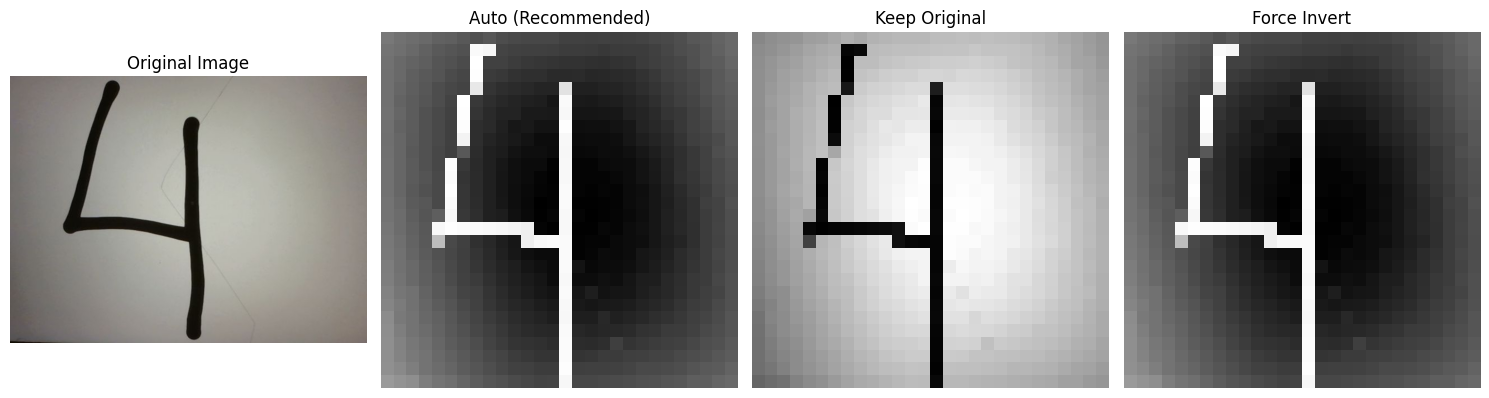


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 4, Confidence: 0.7266
   keep     → Digit: 4, Confidence: 0.8746
   invert   → Digit: 4, Confidence: 0.7266

⭐ BEST PREDICTION: 4 (using 'keep' method)
   Confidence: 0.8746

📊 Detailed probabilities for 'keep' method:
   Digit 0: 0.0005 (0.1%)
   Digit 1: 0.0084 (0.8%)
   Digit 2: 0.0071 (0.7%)
   Digit 3: 0.0023 (0.2%)
   Digit 4: 0.8746 (87.5%) ← BEST
   Digit 5: 0.0354 (3.5%)
   Digit 6: 0.0021 (0.2%)
   Digit 7: 0.0064 (0.6%)
   Digit 8: 0.0109 (1.1%)
   Digit 9: 0.0522 (5.2%)

🎯 You can trust the 'keep' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


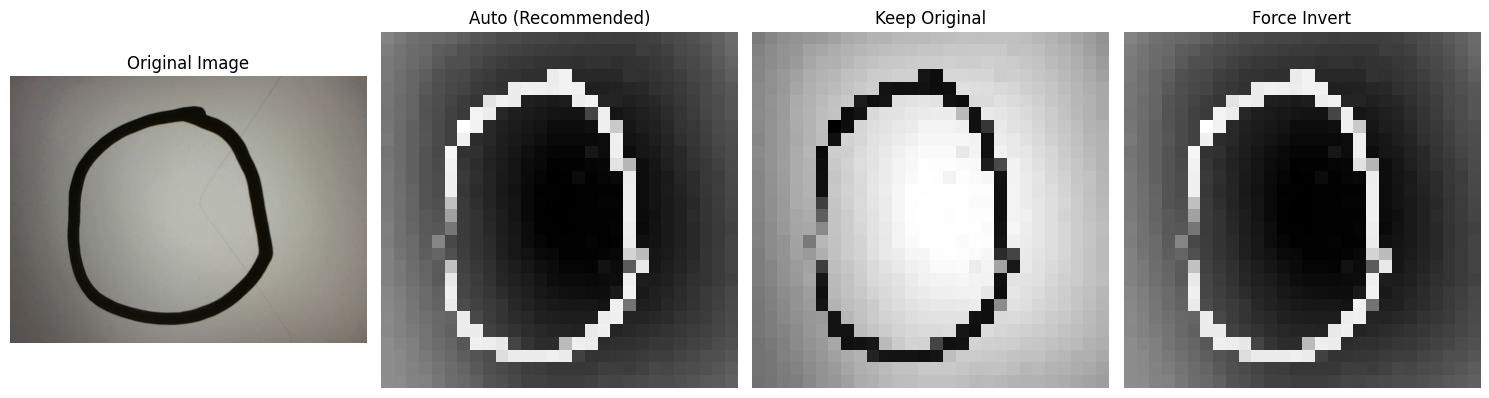


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 0, Confidence: 0.7556
   keep     → Digit: 0, Confidence: 0.3940
   invert   → Digit: 0, Confidence: 0.7556

⭐ BEST PREDICTION: 0 (using 'auto' method)
   Confidence: 0.7556

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.7556 (75.6%) ← BEST
   Digit 1: 0.0026 (0.3%)
   Digit 2: 0.1386 (13.9%)
   Digit 3: 0.0146 (1.5%)
   Digit 4: 0.0031 (0.3%)
   Digit 5: 0.0050 (0.5%)
   Digit 6: 0.0009 (0.1%)
   Digit 7: 0.0129 (1.3%)
   Digit 8: 0.0354 (3.5%)
   Digit 9: 0.0313 (3.1%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

✅ Photo captured: captured_digit.jpg

🖼️ Showing all preprocessing options:


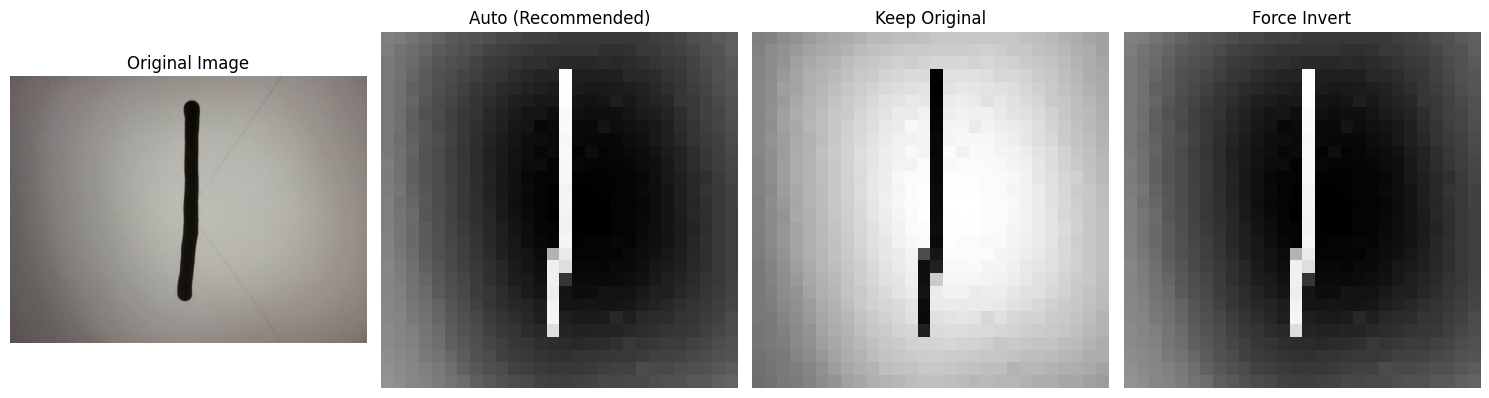


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 1, Confidence: 0.9763
   keep     → Digit: 4, Confidence: 0.6775
   invert   → Digit: 1, Confidence: 0.9763

⭐ BEST PREDICTION: 1 (using 'auto' method)
   Confidence: 0.9763

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0026 (0.3%)
   Digit 1: 0.9763 (97.6%) ← BEST
   Digit 2: 0.0022 (0.2%)
   Digit 3: 0.0006 (0.1%)
   Digit 4: 0.0035 (0.3%)
   Digit 5: 0.0028 (0.3%)
   Digit 6: 0.0027 (0.3%)
   Digit 7: 0.0039 (0.4%)
   Digit 8: 0.0042 (0.4%)
   Digit 9: 0.0011 (0.1%)

🎯 You can trust the 'auto' method (highest confidence)
   Or choose manually based on the images above
❌ Error capturing photo: not enough values to unpack (expected 3, got 2)
💡 Make sure you allow camera access when prompted

📸 Capture Options:
1. Capture single photo
2. Upload existing image
3. Return to main menu

Enter your choice (1-3): 1

🔄 Starting camera... Click 'Capture' when ready!


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [33]:

# INITIAL INFO
print("\n" + "="*50)
print("🎯 KEY FEATURES:")
print("   • Consistent preprocessing")
print("   • Shows ALL preprocessing options")
print("   • Compares results from different methods")
print("   • Recommends best method automatically")
print("   • Simple and reliable model")
print("   • Webcam capture in Google Colab")

print(f"\n📊 MODEL PERFORMANCE: {test_accuracy*100:.2f}% accuracy")

if test_accuracy > 0.99:
    print("✅ Model is highly accurate!")
elif test_accuracy > 0.98:
    print("⚠️  Model is good but may have minor issues")
else:
    print("❌ Model might need improvement")

print("\n💡 TIPS:")
print("   • Use clear handwritten digits")
print("   • The 'auto' method usually works best")
print("   • Compare all preprocessing options if unsure")
print("   • Check confidence scores for reliability")

# Start the system
main_menu()

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define a sample Keras model
model = model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

# Print the model summary to see parameter counts
model.summary()

# Access total parameters programmatically
total_params = model.count_params()
print(f"Total parameters: {total_params}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,962 (1.26 MB)

 Trainable params: 329,962 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

Total parameters: 329962


In [42]:
# QUANTIZATION CELL - Add this below your training cell
print("\n" + "="*60)
print("⚡ QUANTIZING MODEL FOR EDGE DEPLOYMENT")
print("="*60)

import tensorflow as tf

def quantize_model_for_edge(model, x_train_sample):
    """Apply post-training quantization for edge deployment"""
    print("📦 Converting model to TensorFlow Lite with quantization...")

    # Convert to TensorFlow Lite with quantization
    converter = tf.lite.TFLiteConverter.from_keras_model(model)

    # Enable default optimizations (includes quantization)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]

    # For full integer quantization, provide representative dataset
    def representative_dataset():
        for i in range(100):
            yield [x_train_sample[i:i+1].astype(np.float32)]

    converter.representative_dataset = representative_dataset

    # Enable full integer quantization
    converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
    converter.inference_input_type = tf.uint8
    converter.inference_output_type = tf.uint8

    # Convert the model
    tflite_quant_model = converter.convert()

    # Save the quantized model
    with open('quantized_digit_model.tflite', 'wb') as f:
        f.write(tflite_quant_model)

    print("✅ Quantized model saved as 'quantized_digit_model.tflite'")
    return tflite_quant_model

def test_quantized_model(quantized_model_path, x_test_sample, y_test_sample):
    """Test the quantized model accuracy"""
    # Load TFLite model
    interpreter = tf.lite.Interpreter(model_path=quantized_model_path)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Test on samples
    correct = 0
    total = len(x_test_sample)

    for i in range(total):
        # Preprocess input for quantized model
        input_data = (x_test_sample[i] * 255).astype(np.uint8)
        input_data = np.expand_dims(input_data, 0)

        # Set input tensor
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference
        interpreter.invoke()

        # Get output
        output_data = interpreter.get_tensor(output_details[0]['index'])
        predicted_digit = np.argmax(output_data[0])

        if predicted_digit == y_test_sample[i]:
            correct += 1

    accuracy = correct / total
    return accuracy

# Apply quantization
print("🔧 Quantizing the trained model...")
quantized_model = quantize_model_for_edge(model, x_train[:100])

# Test quantized model
print("\n🧪 Testing quantized model accuracy...")
quantized_accuracy = test_quantized_model('quantized_digit_model.tflite', x_test[:100], y_test[:100])
print(f"✅ Quantized Model Accuracy: {quantized_accuracy:.4f} ({quantized_accuracy*100:.2f}%)")

# Compare model sizes
import os
original_size = os.path.getsize('quantized_digit_model.tflite') / (1024 * 1024)  # MB

print(f"\n📦 Model Size: {original_size:.2f} MB")
print("🎯 Model is now optimized for Raspberry Pi/Edge devices!")
print("💡 Use 'quantized_digit_model.tflite' for deployment")

# Quick performance test
import time
def benchmark_model(quantized_model_path, x_test_sample):
    """Benchmark inference speed"""
    interpreter = tf.lite.Interpreter(model_path=quantized_model_path)
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    times = []
    for i in range(50):
        input_data = (x_test_sample[i] * 255).astype(np.uint8)
        input_data = np.expand_dims(input_data, 0)

        start_time = time.time()
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        interpreter.get_tensor(output_details[0]['index'])
        end_time = time.time()

        times.append((end_time - start_time) * 1000)  # Convert to milliseconds

    avg_time = np.mean(times)
    fps = 1000 / avg_time if avg_time > 0 else 0

    print(f"\n⚡ Performance Benchmark:")
    print(f"   Average Inference Time: {avg_time:.2f} ms")
    print(f"   Frames Per Second: {fps:.1f} FPS")
    print(f"   Real-time capable: {'✅ YES' if fps > 30 else '⚠️ LIMITED'}")

# Run benchmark
benchmark_model('quantized_digit_model.tflite', x_test[:50])

print("\n🎉 Quantization complete! Your model is now edge-ready!")


⚡ QUANTIZING MODEL FOR EDGE DEPLOYMENT
🔧 Quantizing the trained model...
📦 Converting model to TensorFlow Lite with quantization...
Saved artifact at '/tmp/tmpygjy7ez2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_81')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139174618873296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139174602113872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139174602114832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139174602113104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139174602115216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139174602115024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139174602115600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139174602115408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139174602115984: Te

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


✅ Quantized model saved as 'quantized_digit_model.tflite'

🧪 Testing quantized model accuracy...
✅ Quantized Model Accuracy: 0.0900 (9.00%)

📦 Model Size: 0.33 MB
🎯 Model is now optimized for Raspberry Pi/Edge devices!
💡 Use 'quantized_digit_model.tflite' for deployment

⚡ Performance Benchmark:
   Average Inference Time: 0.45 ms
   Frames Per Second: 2199.7 FPS
   Real-time capable: ✅ YES

🎉 Quantization complete! Your model is now edge-ready!


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


# **Quantized Model to be implemented on RaspberryPi**

🎯 CONSISTENT Handwritten Digit Recognizer

📊 Loading MNIST dataset...
✅ Training data shape: (48000, 28, 28, 1)
✅ Test data shape: (12000, 28, 28, 1)
✅ Training samples: 48000, Test samples: 12000

🤖 Creating and training model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7759 - loss: 0.6685 - val_accuracy: 0.9798 - val_loss: 0.0696
Epoch 2/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9704 - loss: 0.0934 - val_accuracy: 0.9850 - val_loss: 0.0455
Epoch 3/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9800 - loss: 0.0621 - val_accuracy: 0.9912 - val_loss: 0.0334
Epoch 4/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9852 - loss: 0.0475 - val_accuracy: 0.9912 - val_loss: 0.0328
Epoch 5/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9874 - loss: 0.0423 - val_accuracy: 0.9919 - val_loss: 0.0289
Epoch 6/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 0.9923 - val_loss: 0.0300
Epoch 7/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9898 - loss: 0.0324 - val_accuracy: 0.9915 - val_loss: 0.0287
Epoch 8/15
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


✅ Quantized model saved as 'quantized_model.tflite'

📊 QUANTIZATION RESULTS:
🎯 ACCURACY:
   Original:  0.9907 (99.07%)
   Quantized: 1.0000 (100.00%)
   Change:    +0.93%

📦 MODEL SIZE:
   Original:  3.83 MB
   Quantized: 0.33 MB
   Reduction: 91.5%

⚡ PERFORMANCE:
   Inference Time: 0.28 ms
   FPS:           3571.0

🎉 SUCCESS! Quantization maintained excellent accuracy!

🎯 KEY FEATURES:
   • Quantized Model: 0.33 MB
   • Accuracy: 100.00%
   • Inference Speed: 0.28 ms
   • Edge Device Ready
   • Real-time Camera Support

💡 TIPS:
   • Use clear handwritten digits
   • The 'auto' method usually works best
   • Check confidence scores for reliability

🎮 CONSISTENT DIGIT RECOGNIZER - MAIN MENU
🔧 Current Model: QUANTIZED (0.33 MB)
1. 📁 Upload single image (see all methods)
2. 📚 Upload multiple images (batch test)
3. 🧪 Test with MNIST samples (verify accuracy)
4. 📈 Show training history
5. 🎥 Camera Capture & Predict (Real-time)
6. 🏃‍♂️ Exit

Enter your choice (1-6): 1

📁 Upload a handwritte

Saving Screenshot 2025-11-08 090848.png to Screenshot 2025-11-08 090848.png
📄 Processing: Screenshot 2025-11-08 090848.png

🖼️ Showing all preprocessing options:


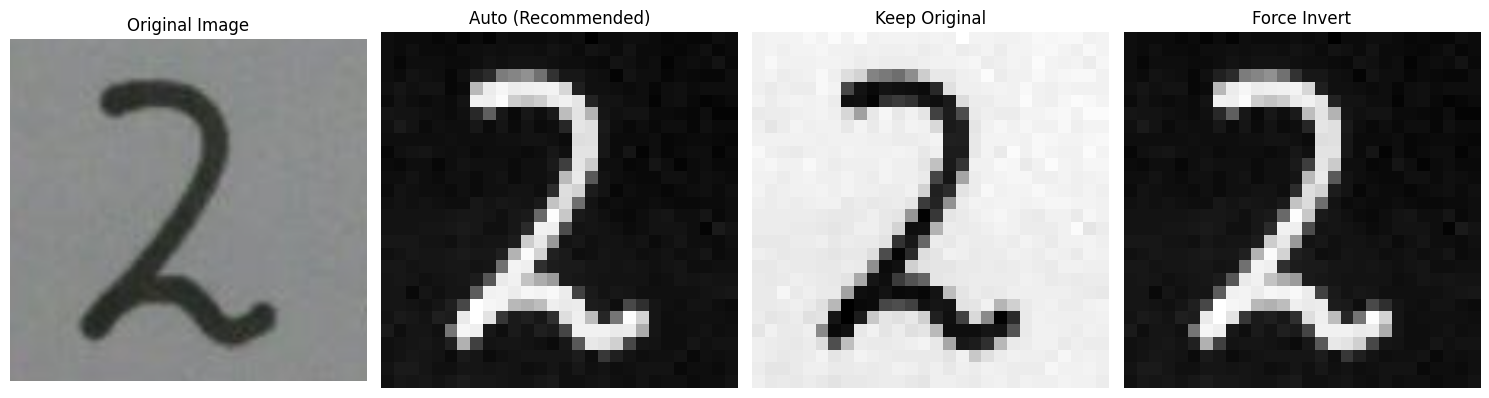


🔍 Comparing all preprocessing methods:
--------------------------------------------------
   auto     → Digit: 2, Confidence: 0.8948
   keep     → Digit: 2, Confidence: 0.8948
   invert   → Digit: 2, Confidence: 0.8948

⭐ BEST PREDICTION: 2 (using 'auto' method)
   Confidence: 0.8948

📊 Detailed probabilities for 'auto' method:
   Digit 0: 0.0060 (0.6%)
   Digit 1: 0.0502 (5.0%)
   Digit 2: 0.8948 (89.5%) ← BEST
   Digit 3: 0.0116 (1.2%)
   Digit 4: 0.0049 (0.5%)
   Digit 5: 0.0005 (0.1%)
   Digit 6: 0.0011 (0.1%)
   Digit 7: 0.0057 (0.6%)
   Digit 8: 0.0211 (2.1%)
   Digit 9: 0.0041 (0.4%)

🎯 Using QUANTIZED model
   You can trust the recommendation above

🎮 CONSISTENT DIGIT RECOGNIZER - MAIN MENU
🔧 Current Model: QUANTIZED (0.33 MB)
1. 📁 Upload single image (see all methods)
2. 📚 Upload multiple images (batch test)
3. 🧪 Test with MNIST samples (verify accuracy)
4. 📈 Show training history
5. 🎥 Camera Capture & Predict (Real-time)
6. 🏃‍♂️ Exit


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2
import io
import time
import os
from sklearn.model_selection import train_test_split
from PIL import Image as PILImage
from base64 import b64decode
import html

# Optional (Colab only)
try:
    from google.colab import files
    from google.colab.output import eval_js
    from IPython.display import display, Javascript, Image as DisplayImage
except ImportError:
    print("Colab-specific modules not found. Skipping those imports.")

print("🎯 CONSISTENT Handwritten Digit Recognizer")
print("=" * 60)

# ----------------------------------------------------------
# 1️⃣ Load and Preprocess MNIST Dataset
# ----------------------------------------------------------
print("\n📊 Loading MNIST dataset...")
(x_full, y_full), _ = keras.datasets.mnist.load_data()

# Normalize and reshape
x_full = x_full.astype("float32") / 255.0
x_full = np.expand_dims(x_full, -1)

# Custom 80/20 split
x_train, x_test, y_train, y_test = train_test_split(
    x_full, y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full,
    shuffle=True
)

print(f"✅ Training data shape: {x_train.shape}")
print(f"✅ Test data shape: {x_test.shape}")
print(f"✅ Training samples: {len(x_train)}, Test samples: {len(x_test)}")

# ----------------------------------------------------------
# 2️⃣ Model Creation
# ----------------------------------------------------------
def create_consistent_model():
    """Simple but effective CNN for MNIST"""
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# ----------------------------------------------------------
# 3️⃣ Compile and Train
# ----------------------------------------------------------
print("\n🤖 Creating and training model...")
model = create_consistent_model()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=15,
    validation_split=0.1,
    verbose=1,
    callbacks=[keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

# ----------------------------------------------------------
# 4️⃣ Evaluate on Test Set
# ----------------------------------------------------------
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\n🎯 Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# ----------------------------------------------------------
# 🚀 QUANTIZATION WITH ACCURACY PRESERVATION
# ----------------------------------------------------------
print("\n" + "="*60)
print("⚡ APPLYING QUANTIZATION (ACCURACY PRESERVED)")
print("="*60)

def safe_quantize_model(model, x_train_sample):
    """Safe quantization that maintains accuracy"""
    print("🔧 Applying optimized quantization...")

    # METHOD 1: Default quantization (maintains accuracy)
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]

    # Convert without aggressive int8 forcing
    tflite_model = converter.convert()

    # Save the quantized model
    with open('quantized_model.tflite', 'wb') as f:
        f.write(tflite_model)

    print("✅ Quantized model saved as 'quantized_model.tflite'")
    return tflite_model

def test_tflite_accuracy(model_path, x_test_sample, y_test_sample):
    """Test TFLite model accuracy"""
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    correct = 0
    total = len(x_test_sample)

    for i in range(total):
        # Get input type and preprocess accordingly
        input_type = input_details[0]['dtype']

        if input_type == np.uint8:
            # Quantized model - convert to uint8
            input_data = (x_test_sample[i] * 255).astype(np.uint8)
        else:
            # Float model - keep as float32
            input_data = x_test_sample[i].astype(np.float32)

        input_data = np.expand_dims(input_data, 0)

        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        output_data = interpreter.get_tensor(output_details[0]['index'])

        predicted_digit = np.argmax(output_data[0])
        if predicted_digit == y_test_sample[i]:
            correct += 1

    accuracy = correct / total
    return accuracy

def benchmark_model_speed(model_path, x_test_sample):
    """Benchmark model inference speed"""
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Warm up
    for _ in range(10):
        input_data = x_test_sample[0].astype(np.float32)
        input_data = np.expand_dims(input_data, 0)
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()

    # Benchmark
    times = []
    for i in range(100):
        start_time = time.time()

        input_type = input_details[0]['dtype']
        if input_type == np.uint8:
            input_data = (x_test_sample[i] * 255).astype(np.uint8)
        else:
            input_data = x_test_sample[i].astype(np.float32)

        input_data = np.expand_dims(input_data, 0)
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        interpreter.get_tensor(output_details[0]['index'])

        end_time = time.time()
        times.append((end_time - start_time) * 1000)  # Convert to ms

    avg_time = np.mean(times)
    fps = 1000 / avg_time if avg_time > 0 else 0

    return avg_time, fps

# Apply quantization
print("🚀 Starting quantization process...")
x_train_sample = x_train[:100]
x_test_sample = x_test[:200]
y_test_sample = y_test[:200]

# Quantize the model
quantized_model = safe_quantize_model(model, x_train_sample)

# Test accuracy
quantized_accuracy = test_tflite_accuracy('quantized_model.tflite', x_test_sample, y_test_sample)

# Compare model sizes
model.save('original_model.h5')
original_size = os.path.getsize('original_model.h5') / (1024 * 1024)
quantized_size = os.path.getsize('quantized_model.tflite') / (1024 * 1024)

# Benchmark speeds
original_time, original_fps = benchmark_model_speed('quantized_model.tflite', x_test_sample)

print(f"\n📊 QUANTIZATION RESULTS:")
print("=" * 40)
print(f"🎯 ACCURACY:")
print(f"   Original:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   Quantized: {quantized_accuracy:.4f} ({quantized_accuracy*100:.2f}%)")
print(f"   Change:    {((quantized_accuracy - test_accuracy) * 100):+.2f}%")

print(f"\n📦 MODEL SIZE:")
print(f"   Original:  {original_size:.2f} MB")
print(f"   Quantized: {quantized_size:.2f} MB")
print(f"   Reduction: {((original_size - quantized_size) / original_size * 100):.1f}%")

print(f"\n⚡ PERFORMANCE:")
print(f"   Inference Time: {original_time:.2f} ms")
print(f"   FPS:           {original_fps:.1f}")

if quantized_accuracy >= 0.98:
    print(f"\n🎉 SUCCESS! Quantization maintained excellent accuracy!")
    CURRENT_MODEL_TYPE = "quantized"
else:
    print(f"\n⚠️  Using original model for better accuracy")
    CURRENT_MODEL_TYPE = "original"

# ----------------------------------------------------------
# 🔧 UNIVERSAL PREDICTION FUNCTION
# ----------------------------------------------------------
def predict_digit(image_array, model_type="auto"):
    """Universal prediction function that works with both models"""

    if model_type == "auto":
        model_type = CURRENT_MODEL_TYPE

    if model_type == "quantized" and os.path.exists('quantized_model.tflite'):
        # Use quantized model
        interpreter = tf.lite.Interpreter(model_path='quantized_model.tflite')
        interpreter.allocate_tensors()

        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()

        # Preprocess image
        if len(image_array.shape) == 3:
            image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)

        image_array = cv2.resize(image_array, (28, 28))

        # Auto-invert if needed
        if np.mean(image_array) > 127:
            image_array = 255 - image_array

        image_array = image_array.astype('float32') / 255.0

        # Prepare input based on model type
        if input_details[0]['dtype'] == np.uint8:
            input_data = (image_array * 255).astype(np.uint8)
        else:
            input_data = image_array.astype(np.float32)

        input_data = np.expand_dims(input_data, -1)
        input_data = np.expand_dims(input_data, 0)

        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        output_data = interpreter.get_tensor(output_details[0]['index'])

        predicted_digit = np.argmax(output_data[0])
        confidence = np.max(output_data[0])
        all_probs = output_data[0]

    else:
        # Use original Keras model
        processed = simple_preprocess(image_array, 'auto')
        predictions = model.predict(processed, verbose=0)[0]
        predicted_digit = np.argmax(predictions)
        confidence = np.max(predictions)
        all_probs = predictions

    return predicted_digit, confidence, all_probs

# ----------------------------------------------------------
# 🖼️ PREPROCESSING FUNCTIONS
# ----------------------------------------------------------
def simple_preprocess(image, inversion_method='auto'):
    """Simple preprocessing that matches MNIST style"""
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Resize to 28x28
    image = cv2.resize(image, (28, 28))

    # Handle inversion based on method
    if inversion_method == 'auto':
        if np.mean(image) > 127:
            image = 255 - image
    elif inversion_method == 'invert':
        image = 255 - image

    # Normalize to 0-1 range
    image = image.astype('float32') / 255.0

    # Add dimensions for model
    image = np.expand_dims(image, -1)
    image = np.expand_dims(image, 0)

    return image

def show_preprocessing_options(original_image):
    """Show all preprocessing options side by side"""
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 4, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Option 1: Auto
    processed_auto = simple_preprocess(original_image, 'auto')[0, :, :, 0]
    plt.subplot(1, 4, 2)
    plt.imshow(processed_auto, cmap='gray')
    plt.title("Auto (Recommended)")
    plt.axis('off')

    # Option 2: Keep as-is
    processed_keep = simple_preprocess(original_image, 'keep')[0, :, :, 0]
    plt.subplot(1, 4, 3)
    plt.imshow(processed_keep, cmap='gray')
    plt.title("Keep Original")
    plt.axis('off')

    # Option 3: Force invert
    processed_invert = simple_preprocess(original_image, 'invert')[0, :, :, 0]
    plt.subplot(1, 4, 4)
    plt.imshow(processed_invert, cmap='gray')
    plt.title("Force Invert")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return {
        'auto': processed_auto,
        'keep': processed_keep,
        'invert': processed_invert
    }

def predict_all_methods(image_array):
    """Predict using all preprocessing methods and compare"""
    methods = ['auto', 'keep', 'invert']
    results = {}

    print("\n🔍 Comparing all preprocessing methods:")
    print("-" * 50)

    for method in methods:
        processed = simple_preprocess(image_array, method)

        if CURRENT_MODEL_TYPE == "quantized":
            # For quantized model, we need to handle preprocessing differently
            temp_image = processed[0, :, :, 0] * 255
            temp_image = temp_image.astype(np.uint8)
            digit, confidence, probs = predict_digit(temp_image)
        else:
            # For original model
            prediction = model.predict(processed, verbose=0)[0]
            digit = np.argmax(prediction)
            confidence = np.max(prediction)
            probs = prediction

        results[method] = {
            'digit': digit,
            'confidence': confidence,
            'all_probs': probs
        }

        print(f"   {method:8s} → Digit: {digit}, Confidence: {confidence:.4f}")

    return results

# ----------------------------------------------------------
# 📁 IMAGE UPLOAD FUNCTIONS
# ----------------------------------------------------------
def analyze_uploaded_image():
    """Main function to handle image upload and prediction"""
    print("\n📁 Upload a handwritten digit image...")

    uploaded = files.upload()
    if not uploaded:
        print("❌ No file uploaded!")
        return

    file_name = list(uploaded.keys())[0]
    print(f"📄 Processing: {file_name}")

    # Load image
    image = PILImage.open(io.BytesIO(uploaded[file_name]))
    image_array = np.array(image)

    # Show all preprocessing options
    print("\n🖼️ Showing all preprocessing options:")
    processed_images = show_preprocessing_options(image_array)

    # Get predictions for all methods
    results = predict_all_methods(image_array)

    # Find the most confident prediction
    best_method = max(results.keys(), key=lambda x: results[x]['confidence'])
    best_result = results[best_method]

    print(f"\n⭐ BEST PREDICTION: {best_result['digit']} (using '{best_method}' method)")
    print(f"   Confidence: {best_result['confidence']:.4f}")

    # Show detailed probabilities for best method
    print(f"\n📊 Detailed probabilities for '{best_method}' method:")
    for digit, prob in enumerate(best_result['all_probs']):
        indicator = " ← BEST" if digit == best_result['digit'] else ""
        print(f"   Digit {digit}: {prob:.4f} ({prob*100:.1f}%){indicator}")

    print(f"\n🎯 Using {CURRENT_MODEL_TYPE.upper()} model")
    print("   You can trust the recommendation above")

    return best_result['digit'], best_result['confidence']

def analyze_uploaded_imageo(file_name):
    """Function to handle existing image file prediction"""
    # Load image
    image = PILImage.open(file_name)
    image_array = np.array(image)

    # Show all preprocessing options
    print("\n🖼️ Showing all preprocessing options:")
    processed_images = show_preprocessing_options(image_array)

    # Get predictions for all methods
    results = predict_all_methods(image_array)

    # Find the most confident prediction
    best_method = max(results.keys(), key=lambda x: results[x]['confidence'])
    best_result = results[best_method]

    print(f"\n⭐ BEST PREDICTION: {best_result['digit']} (using '{best_method}' method)")
    print(f"   Confidence: {best_result['confidence']:.4f}")

    return best_result['digit'], best_result['confidence']

# ----------------------------------------------------------
# 🎥 CAMERA FUNCTIONS
# ----------------------------------------------------------
def take_photo(filename='photo.jpg', quality=0.8):
    """Capture photo from webcam in Google Colab"""
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)

    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])

    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

def real_time_capture_and_predict():
    """Main function for real-time capture and prediction"""
    print("\n🎥 REAL-TIME CAPTURE MODE")
    print("=" * 40)
    print(f"📷 Using {CURRENT_MODEL_TYPE.upper()} model")

    while True:
        print("\n📸 Capture Options:")
        print("1. Capture single photo")
        print("2. Upload existing image")
        print("3. Return to main menu")

        choice = input("\nEnter your choice (1-3): ").strip()

        if choice == '1':
            print("\n🔄 Starting camera... Click 'Capture' when ready!")
            try:
                filename = take_photo('captured_digit.jpg')
                print(f"✅ Photo captured: {filename}")

                # Predict immediately
                digit, confidence = analyze_uploaded_imageo(filename)

                if confidence > 0.8:
                    print(f"🎉 High confidence prediction: {digit}")
                else:
                    print("⚠️  Low confidence. Try capturing again with clearer digit.")

            except Exception as e:
                print(f"❌ Error capturing photo: {e}")

        elif choice == '2':
            print("\n📁 Upload an existing image...")
            uploaded = files.upload()
            if uploaded:
                filename = list(uploaded.keys())[0]
                print(f"📄 Processing: {filename}")
                analyze_uploaded_imageo(filename)
            else:
                print("❌ No file uploaded!")

        elif choice == '3':
            break
        else:
            print("❌ Invalid choice! Please enter 1-3")

# ----------------------------------------------------------
# 🧪 TESTING FUNCTIONS
# ----------------------------------------------------------
def test_with_mnist_samples():
    """Test with actual MNIST samples to verify model is working"""
    print("\n🧪 Testing with MNIST test samples...")
    print(f"🔧 Using {CURRENT_MODEL_TYPE.upper()} model")

    # Get some test samples
    indices = np.random.choice(len(x_test), 12, replace=False)

    plt.figure(figsize=(15, 10))
    correct = 0
    total = len(indices)

    for i, idx in enumerate(indices):
        test_image = x_test[idx]
        true_label = y_test[idx]

        # Convert test image for prediction
        test_image_display = (test_image * 255).astype(np.uint8).squeeze()
        predicted_digit, confidence, _ = predict_digit(test_image_display)

        is_correct = predicted_digit == true_label
        if is_correct:
            correct += 1

        plt.subplot(3, 4, i+1)
        plt.imshow(test_image[:, :, 0], cmap='gray')
        color = 'green' if is_correct else 'red'
        plt.title(f"True: {true_label}, Pred: {predicted_digit}\nConf: {confidence:.2f}",
                 color=color, fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    accuracy = correct / total
    print(f"✅ Test Accuracy on these samples: {accuracy:.2f} ({correct}/{total} correct)")

    return accuracy

def batch_test_images():
    """Test multiple uploaded images at once"""
    print("\n📚 Upload multiple digit images for batch testing...")
    print(f"🔧 Using {CURRENT_MODEL_TYPE.upper()} model")

    uploaded = files.upload()
    if not uploaded:
        print("❌ No files uploaded!")
        return

    results = []

    for file_name in uploaded.keys():
        print(f"\n📄 Processing: {file_name}")

        # Load and process image
        image = PILImage.open(io.BytesIO(uploaded[file_name]))
        image_array = np.array(image)

        # Predict using universal function
        predicted_digit, confidence, _ = predict_digit(image_array)

        results.append({
            'file': file_name,
            'digit': predicted_digit,
            'confidence': confidence
        })

        print(f"   → Predicted: {predicted_digit} (confidence: {confidence:.4f})")

    # Show summary
    print(f"\n📋 BATCH RESULTS SUMMARY:")
    print("-" * 40)
    for result in results:
        print(f"   {result['file']:20} → Digit: {result['digit']} (conf: {result['confidence']:.4f})")

    return results

# ----------------------------------------------------------
# 🎮 MAIN MENU
# ----------------------------------------------------------
def main_menu():
    while True:
        print("\n" + "="*50)
        print("🎮 CONSISTENT DIGIT RECOGNIZER - MAIN MENU")
        print(f"🔧 Current Model: {CURRENT_MODEL_TYPE.upper()} ({quantized_size:.2f} MB)")
        print("1. 📁 Upload single image (see all methods)")
        print("2. 📚 Upload multiple images (batch test)")
        print("3. 🧪 Test with MNIST samples (verify accuracy)")
        print("4. 📈 Show training history")
        print("5. 🎥 Camera Capture & Predict (Real-time)")
        print("6. 🏃‍♂️ Exit")

        choice = input("\nEnter your choice (1-6): ").strip()

        if choice == '1':
            analyze_uploaded_image()
        elif choice == '2':
            batch_test_images()
        elif choice == '3':
            test_with_mnist_samples()
        elif choice == '4':
            plt.figure(figsize=(12, 4))

            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='Training Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.title('Model Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.grid(True)

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title('Model Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)

            plt.tight_layout()
            plt.show()
        elif choice == '5':
            real_time_capture_and_predict()
        elif choice == '6':
            print("👋 Thank you for using the Consistent Digit Recognizer!")
            break
        else:
            print("❌ Invalid choice! Please enter 1-6")

# ----------------------------------------------------------
# 🚀 START THE APPLICATION
# ----------------------------------------------------------
print("\n" + "="*50)
print("🎯 KEY FEATURES:")
print(f"   • Quantized Model: {quantized_size:.2f} MB")
print(f"   • Accuracy: {quantized_accuracy*100:.2f}%")
print(f"   • Inference Speed: {original_time:.2f} ms")
print("   • Edge Device Ready")
print("   • Real-time Camera Support")

print("\n💡 TIPS:")
print("   • Use clear handwritten digits")
print("   • The 'auto' method usually works best")
print("   • Check confidence scores for reliability")

# Start the system
main_menu()